# `vizart`: Pareto chart - most prevalent drug by country

This graph was inspired by the following tweet:

https://x.com/stats_feed/status/1709559495213588529?s=20

## Imports

In [1]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import pandas as pd
import numpy as np

## Settings

In [2]:
# And system font so matplotlib sees them
for font in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
    font_manager.fontManager.addfont(font)

## Data

In [3]:
df = pd.DataFrame.from_dict(
    {
        "Afghanistan": ("Heroin, opium", "AF"),
        "Argentina": ("Cannabis", "AR"),
        "Australia": ("Cannabis", "AU"),
        "Azerbaijan": ("Heroin", "AZ"),
        "Belarus": ("Opium", "BY"),
        "Belgium": ("Cannabis", "BE"),
        "Canada": ("Cannabis", "CA"),
        "Chile": ("Cannabis", "CL"),
        "China": ("Methamphetamine", "CN"),
        "Croatia": ("Heroin", "HR"),
        "Czechia": ("Benzodiazepines", "CZ"),
        "France": ("Cannabis", "FR"),
        "Germany": ("Cannabis", "DE"),
        "Hong Kong": ("Heroin, opium", "HK"),
        "India": ("Heroin", "IN"),
        "Indonesia": ("Cannabis", "ID"),
        "Iran": ("Opium", "IR"),
        "Ireland": ("Cannabis", "IE"),
        "Israel": ("Cannabis", "IL"),
        "Italy": ("Cannabis", "IT"),
        "Japan": ("Methamphetamine", "JP"),
        "Lebanon": ("Cannabis", "LB"),
        "Malaysia": ("Methamphetamine", "MY"),
        "Mexico": ("Cannabis", "MX"),
        "Mongolia": ("Methamphetamine", "MN"),
        "Netherlands": ("Benzodiazepines", "NL"),
        "Nigeria": ("Cannabis", "NG"),
        "Norway": ("Cannabis", "NO"),
        "Pakistan": ("Cannabis", "PK"),
        "Philippines": ("Cannabis", "PH"),
        "Poland": ("Cannabis", "PL"),
        "South Africa": ("Cannabis", "ZA"),
        "South Korea": ("Methamphetamine", "KR"),
        "Spain": ("Cannabis", "ES"),
        "Sweden": ("Cannabis", "SE"),
        "Tajikistan": ("Heroin", "TJ"),
        "Trinidad and Tobago": ("Cocaine", "TT"),
        "Turkey": ("Cannabis", "TR"),
        "Turkmenistan": ("Opium", "TM"),
        "USA": ("Cannabis", "US"),
        "UK": ("Cannabis", "GB"),
        "Ukraine": ("Opioids", "UA"),
        "Venezuela": ("Benzodiazepines", "VE"),
        "Vietnam": ("Heroin", "VN")
    },
    orient="index",
    columns=["drug", "short_code"]
)

df


,drug,short_code
Afghanistan,"Heroin, opium",AF
Argentina,Cannabis,AR
Australia,Cannabis,AU
Azerbaijan,Heroin,AZ
Belarus,Opium,BY
Belgium,Cannabis,BE
Canada,Cannabis,CA
Chile,Cannabis,CL
China,Methamphetamine,CN
Croatia,Heroin,HR


In [4]:
def f(s):
    return [word.strip().lower() for word in s.split(",")]


In [5]:
df["drug"] = df["drug"].apply(f)

df

,drug,short_code
Afghanistan,"[heroin, opium]",AF
Argentina,[cannabis],AR
Australia,[cannabis],AU
Azerbaijan,[heroin],AZ
Belarus,[opium],BY
Belgium,[cannabis],BE
Canada,[cannabis],CA
Chile,[cannabis],CL
China,[methamphetamine],CN
Croatia,[heroin],HR


In [6]:
df = (df
    .explode("drug")
    .reset_index()
    .rename(columns={"index": "country"})
)

df

,country,drug,short_code
0,Afghanistan,heroin,AF
1,Afghanistan,opium,AF
2,Argentina,cannabis,AR
3,Australia,cannabis,AU
4,Azerbaijan,heroin,AZ
5,Belarus,opium,BY
6,Belgium,cannabis,BE
7,Canada,cannabis,CA
8,Chile,cannabis,CL
9,China,methamphetamine,CN


In [7]:
data = pd.DataFrame()
data["val_count"] = df["drug"].value_counts()
data.index.name = None
data

,val_count
cannabis,24
heroin,7
opium,5
methamphetamine,5
benzodiazepines,3
cocaine,1
opioids,1


In [8]:
data["val_count"]/data["val_count"].sum()

cannabis           0.521739
heroin             0.152174
opium              0.108696
methamphetamine    0.108696
benzodiazepines    0.065217
cocaine            0.021739
opioids            0.021739
Name: val_count, dtype: float64

### Calculate relative values for Pareto
* rel: relative value
* cs: cummulative sum
* rcs: realtive cummulative sume

In [9]:
data["rel"] = data["val_count"] / data["val_count"].sum()
data["cs"] = data["val_count"].cumsum()
data["rcs"] = data["cs"] / data["val_count"].sum()

data

,val_count,rel,cs,rcs
cannabis,24,0.521739,24,0.521739
heroin,7,0.152174,31,0.673913
opium,5,0.108696,36,0.782609
methamphetamine,5,0.108696,41,0.891304
benzodiazepines,3,0.065217,44,0.956522
cocaine,1,0.021739,45,0.978261
opioids,1,0.021739,46,1.000000


### Group data for labels

In [10]:
grouped = df.groupby(
    by=["drug"]
)

In [11]:
for name, group in grouped:
    print(name)
    print(group)
    print("\n")

('benzodiazepines',)
        country             drug short_code
11      Czechia  benzodiazepines         CZ
27  Netherlands  benzodiazepines         NL
44    Venezuela  benzodiazepines         VE


('cannabis',)
         country      drug short_code
2      Argentina  cannabis         AR
3      Australia  cannabis         AU
6        Belgium  cannabis         BE
7         Canada  cannabis         CA
8          Chile  cannabis         CL
12        France  cannabis         FR
13       Germany  cannabis         DE
17     Indonesia  cannabis         ID
19       Ireland  cannabis         IE
20        Israel  cannabis         IL
21         Italy  cannabis         IT
23       Lebanon  cannabis         LB
25        Mexico  cannabis         MX
28       Nigeria  cannabis         NG
29        Norway  cannabis         NO
30      Pakistan  cannabis         PK
31   Philippines  cannabis         PH
32        Poland  cannabis         PL
33  South Africa  cannabis         ZA
35         Spain  cannabis 

In [12]:
for drug in data.index:
    print(drug)
    print(grouped.get_group(drug)["short_code"].values)
    print("\n")

cannabis
['AR' 'AU' 'BE' 'CA' 'CL' 'FR' 'DE' 'ID' 'IE' 'IL' 'IT' 'LB' 'MX' 'NG'
 'NO' 'PK' 'PH' 'PL' 'ZA' 'ES' 'SE' 'TR' 'US' 'GB']


heroin
['AF' 'AZ' 'HR' 'HK' 'IN' 'TJ' 'VN']


opium
['AF' 'BY' 'HK' 'IR' 'TM']


methamphetamine
['CN' 'JP' 'MY' 'MN' 'KR']


benzodiazepines
['CZ' 'NL' 'VE']


cocaine
['TT']


opioids
['UA']




## Plot

In [13]:
plt.rcParams.update(
    {
        "font.family": "Roboto",
        "font.size": 22,
        "hatch.linewidth": 1.75,
    }
)

In [14]:
bar_width = 0.9
colour_light = "#62a0ea"
colour_dark ="#1a5fb4" 

Text(1, -0.185, 'by @pawjast\nmade with @matplotlib ♥')

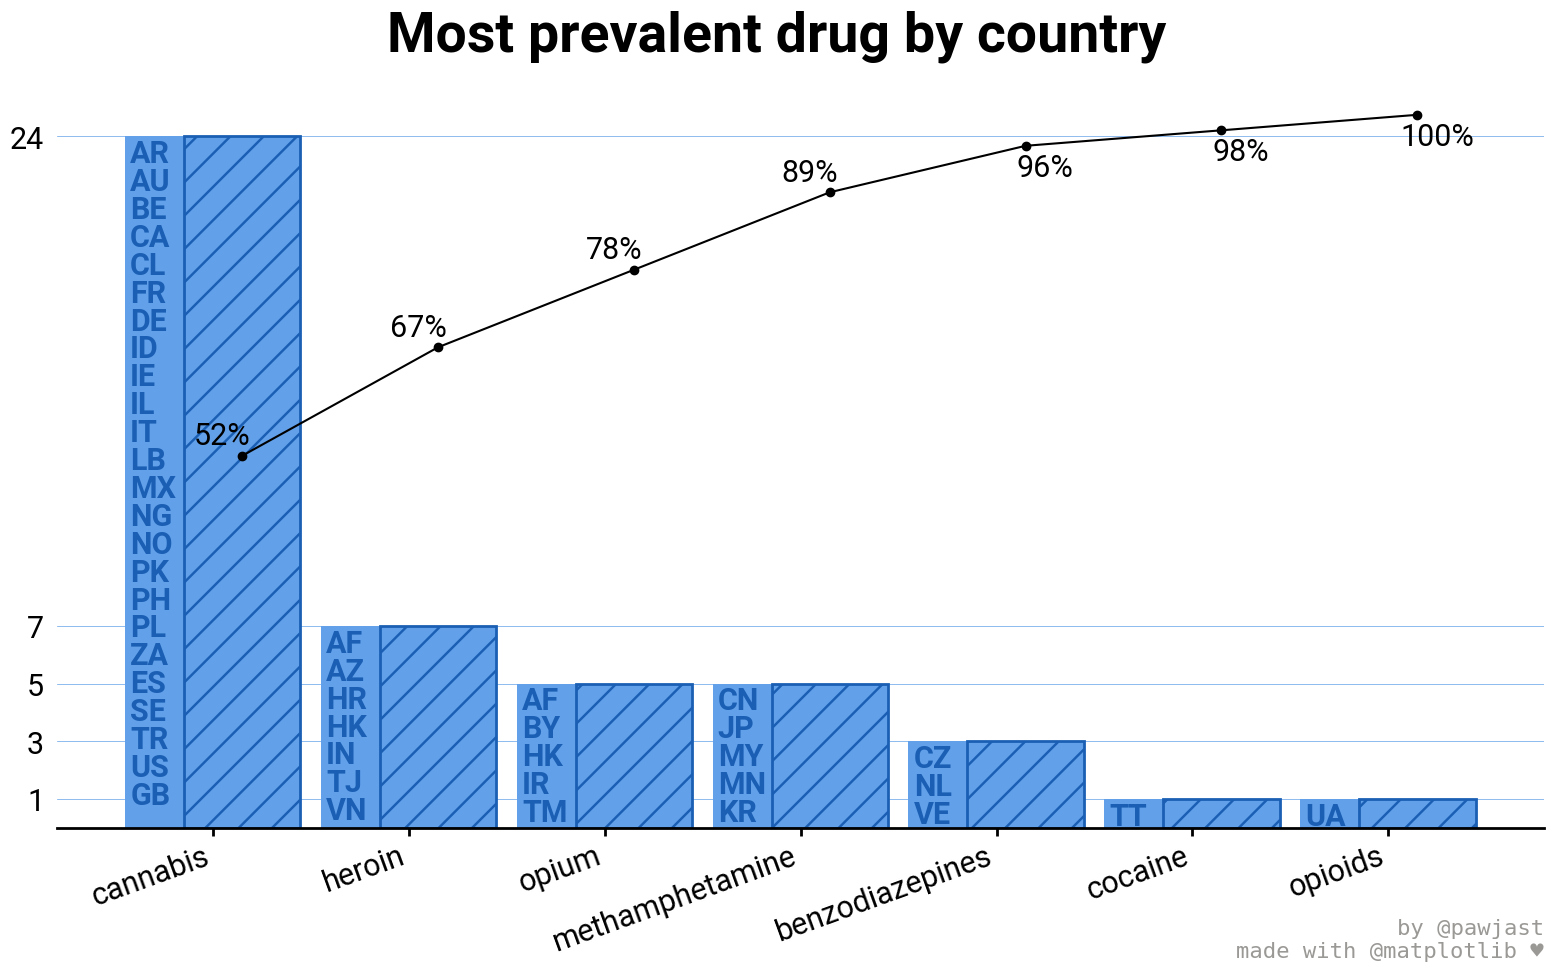

In [15]:
fig, ax = plt.subplots(
    figsize=(16, 10),
    facecolor="white"
)

fig.suptitle(
    "Most prevalent drug by country",
    fontsize=40,
    weight="bold"
)

# --- PLOT BARS ---
# fill
ax.bar(
    x=data.index,
    height=data["val_count"],
    width=bar_width,
    color=colour_light
)
# edge
x_val_alt = np.arange(0,len(data.index)) + 0.33*0.45  # x value for hatched bar and dots on the line
ax.bar(
    x=x_val_alt,
    height=data["val_count"],
    width=bar_width*0.66,
    color=(1, 1, 1, 0),
    edgecolor=colour_dark,
    lw=2,
    hatch="/"
)

# --- PLOT LINE ---
# add second Y-axis
ax2 = ax.twinx()
ax2.plot(
    x_val_alt,
    data["rcs"],
    marker="o",
    color="black"
)

# common parameters for the line plot labels
text_params = {
    "color": "black",
    "ha": "center",
    "va": "center"
}

# LABELS - line plot
for x_val, y_val in zip (x_val_alt, data["rcs"]):
    # set the format of the text to %
    text = f"{y_val:.0%}"
    
    # place the text labels on the graph
    if y_val > .95:
        ax2.text(
            x=x_val + 0.10,
            y=y_val - 0.030,
            s=text, 
            **text_params
        )
    else:
        ax2.text(
            x=x_val - 0.10,
            y=y_val + 0.028,
            s=text,
            **text_params
        )

# LABELS - bar plot (countries short codes)
for i, drug in enumerate(data.index, start=0):
    countries = grouped.get_group(drug)["short_code"].values
    text = ax.text(
            x=i-0.47*bar_width,
            y=data["val_count"][drug]-0.1,
            s=countries[0],
            va="top",
            ha="left",
            color=colour_dark,
            weight="bold"
    )
    if len(countries) > 1:
        for country in countries[1:]:
            text = ax.annotate(
                text=country,
                xycoords=text,
                # xy=(0, -.785),
                xy=(0, -.755),
                color=colour_dark,
                weight="bold"
            )

ax.set_ylim(0, 25)
ax.set_yticks(data["val_count"].unique())

ax2.set_ylim(0, 1.01)
ax2.set_yticks(np.arange(0, 1.05, 0.1))

for a in [ax, ax2]:
    a.tick_params(
        axis="both",
        which="major",
        left=False
    )

    # Hide spines
    a.spines.right.set_visible(False)
    a.spines.top.set_visible(False)
    a.spines.left.set_visible(False)

# Tweak bottom spine
ax2.spines.bottom.set_visible(False)
ax.spines.bottom.set_linewidth(2)

# Hide ticks
ax2.tick_params(
    right=False,
    labelright=False
)

ax.tick_params(
    width=2,
    length=6,

)

# Rotate x-axis tick labels
ax.set_xticks(range(len(data)))
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=20,
    ha="right"
);

ax.grid(
    axis="y",
    lw=0.5,
    color=colour_light
)
ax.set_axisbelow(True)

plt.tight_layout()

ax.text(
    1, -0.185,
    "by @pawjast\nmade with @matplotlib \u2665",
    transform =ax.transAxes,
    horizontalalignment="right",
    verticalalignment="bottom",
    color="#9a9996",
    fontsize=16,
    family="monospace",
    weight="medium"
)

# plt.savefig(
#     fname="pawjast.png",
#     format="png",
#     dpi=125
# );